# Neural Network Framework

### Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
    
%load_ext autoreload
%autoreload 2

### Definitions

In [2]:
class Sigmoid(object):
  def forward(self, Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache
  
  def backward(self, cache):
    Z = cache
    
    s = 1 / (1 + np.exp(-Z))
    dZ = s * (1 - s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

class Relu(object):
  def forward(self, Z):
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache
 
  def backward(self, cache):
    Z = cache
    dZ = np.ones(Z.shape) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [3]:
class LogisticLoss(object):
  def forward(self, A, Y):
    return -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
  
  def backward(self, A, Y):
    return -(Y / A) + (1 - Y) / (1 - A)

In [4]:
class Model(object):
  def __init__(self, layers, loss):
    self.layers = layers
    self.loss = loss
    
  def forward(self, X):
    Y = X
    cache = {}
    
    for layer in self.layers:
      Y, layer_cache = layer.forward(Y)
      cache[layer] = layer_cache
      
    return Y, cache
    
  def backward(self, A, Y, cache):
    dA = self.loss.backward(A, Y)
    grads = {}
    
    for layer in reversed(self.layers):
      dA, layer_grads = layer.backward(dA, cache[layer])
      grads[layer] = layer_grads
      
    return grads
  
  def update(self, grads, learning_rate):
    for layer in self.layers:
      layer.update(grads[layer], learning_rate)

class Layer(object):
  pass

class Dense(Layer):
  def __init__(self, input_dim, output_dim, activation):
    self.W = np.random.randn(output_dim, input_dim) * 0.01
    self.b = np.zeros([output_dim, 1])
    self.activation = activation
    
  def forward(self, X):
    Z = np.dot(self.W, X) + self.b
    A, activation_cache = self.activation.forward(Z)
    cache = {'X': X, 'W': self.W, 'b': self.b, 'activation': activation_cache}
    return A, cache
  
  def backward(self, dA, cache):
    m = dA.shape[1]
    
    dZ = dA * self.activation.backward(cache['activation'])
    dW = np.dot(dZ, cache['X'].T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dX = np.dot(cache['W'].T, dZ)
    
    grads = {
      'dW': dW,
      'db': db
    }
    
    return dX, grads
  
  def update(self, grads, learning_rate):
    self.W -= learning_rate * grads['dW']
    self.b -= learning_rate * grads['db']

### Dataset

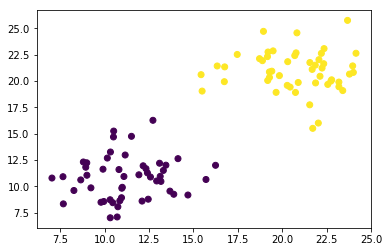

In [5]:
m = 100
X = np.ones([2, m]) + 10
X[:, m // 2:] += 10
X += np.random.randn(X.shape[0], X.shape[1]) * 2
Y = np.hstack([np.zeros((1, m // 2)), np.ones((1, m // 2))])

plt.scatter(X[0, :], X[1, :], c=Y)

### Define and train model

In [6]:
layers = [
  Dense(input_dim=2, output_dim=10, activation=Relu()),
  Dense(input_dim=10, output_dim=5, activation=Relu()),
  Dense(input_dim=5, output_dim=1, activation=Sigmoid())
]

model = Model(layers, loss=LogisticLoss())

steps = 10000
log_interval = 500
learning_rate = 0.01

for i in range(steps):
  A, cache = model.forward(X)
  loss = model.loss.forward(A, Y)
  grads = model.backward(A, Y, cache)
  model.update(grads, learning_rate)
  
  if i % log_interval == 0:
    print('step: %s, loss: %s' % (i, loss))

step: 0, loss: 0.693160241123
step: 500, loss: 0.69313801195
step: 1000, loss: 0.69311431958
step: 1500, loss: 0.693015986902
step: 2000, loss: 0.691824751381
step: 2500, loss: 0.610773171177
step: 3000, loss: 0.511077942711
step: 3500, loss: 0.404019934359
step: 4000, loss: 0.286522375957
step: 4500, loss: 0.178877931213
step: 5000, loss: 0.113986409868
step: 5500, loss: 0.0786976919762
step: 6000, loss: 0.0580082036384
step: 6500, loss: 0.0437500771099
step: 7000, loss: 0.0326401376719
step: 7500, loss: 0.0249582204082
step: 8000, loss: 0.0198771054021
step: 8500, loss: 0.0163496853391
step: 9000, loss: 0.0138084375697
step: 9500, loss: 0.0119064906124
